<img src="https://raw.githubusercontent.com/UXARRAY/uxarray/main/docs/_static/images/logos/uxarray_logo_h_dark.svg"
     width="30%"
     alt="UXarray logo"
     align="right"
/>

# MPAS Ocean

In this recipie, you will learn how to create visualizations of global ocean depth data using MPAS-Ocean model output. The recipe includes techniques for both global-scale visualization and regional analysis, with a specific focus on the Gulf of Mexico region.

## Visualization Objectives

This recipe will guide you through creating:

* Global ocean bottom depth visualizations 
* Regional ocean bottom depth visualizations over the Gulf of Mexico


-----



In [ ]:
import cartopy.crs as ccrs
import uxarray as ux

In [3]:
grid_path = "../../meshfiles/oQU120.grid.nc"
data_path = "../../meshfiles/oQU120.data.nc"

uxds = ux.open_dataset(grid_path, data_path)

## Data Preparation

### Global Ocean Data
The global MPAS-Ocean grid data requires no preprocessing for our visualization purposes, as it already encompasses the complete global domain.

In [7]:
bottom_depth = uxds["bottomDepth"]
bottom_depth.uxgrid.n_face

28571

### Regional Focus: Gulf of Mexico
To create a detailed regional visualization of the Gulf of Mexico, we'll perform a spatial subset of our global data. By applying a bounding circle operation centered at 90°W longitude and 25°N latitude with a 9-degree radius, we can focus our analysis specifically on the Gulf region. This subsetting approach significantly reduces the computational demands of our visualization routines.


In [6]:
bottom_depth_gulf = bottom_depth.subset.bounding_circle((-90.0, 25.0), r=9)
bottom_depth_gulf.uxgrid.n_face

165

## Global Ocean Depth Visualization

For our global visualization, we selected the Robinson projection combined with raster plotting to effectively display worldwide ocean depth data. The 4.0 pixel ratio setting ensures clear resolution while maintaining efficient performance across the entire global domain.

:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude bottomDepth)
   .Coastline.I :Feature   [Longitude,Latitude]
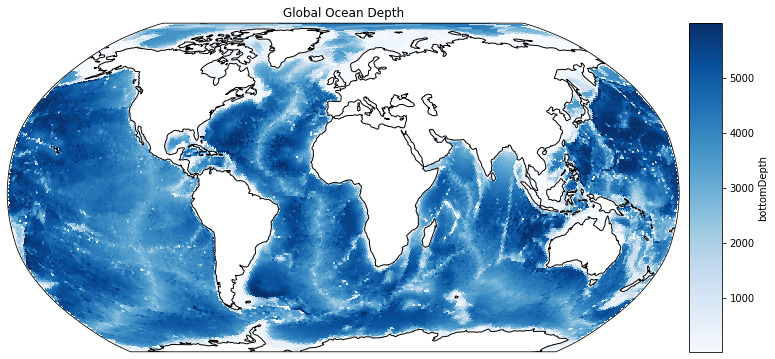

In [8]:
bottom_depth.plot.polygons(
    rasterize=True,
    backend="matplotlib",
    projection=ccrs.Robinson(),
    coastline="110m",
    cmap="Blues",
    width=1000,
    pixel_ratio=4.0,
    title="Global Ocean Depth",
)

## Regional Visualization: Gulf of Mexico

For our detailed analysis of the Gulf of Mexico region, we transition to a vector-based polygon visualization approach. This shift from our global visualization strategy is driven by the reduced computational demands of our regional subset, which contains only 164 faces. Vector polygons offer several advantages at this scale, including precise boundary representation and enhanced detail visualization.


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (bottomDepth)
   .Coastline.I :Feature   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]
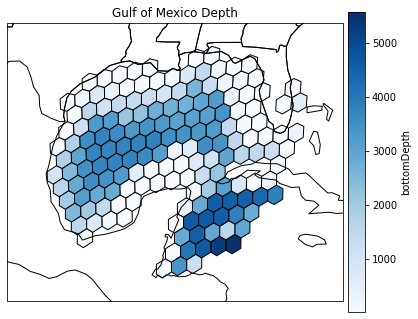

In [10]:
bottom_depth_gulf.plot(
    rasterize=False,
    backend="matplotlib",
    projection=ccrs.Robinson(),
    features=["states", "coastline"],
    cmap="Blues",
    width=500,
    title="Gulf of Mexico Depth",
)